In [41]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [42]:
# read data
path = "data/npf_train.csv"
df = pd.read_csv(path)

In [43]:
df.head()

,id,date,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,1,2000-02-23,nonevent,False,380.528120,0.802001,380.371466,0.889550,381.816207,1.292593,...,-10.730843,1.381815,-10.282754,1.870056,8.356761,4.534937,0.178084,0.123402,0.002546,0.000686
1,2,2000-03-25,Ib,False,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
2,3,2000-04-06,Ib,False,372.363293,0.626329,372.245689,0.615803,372.847246,0.647279,...,0.991521,1.914186,1.846503,1.954748,14.286261,9.572444,0.418313,0.344386,0.000541,0.000072
3,4,2000-04-11,nonevent,False,381.437442,7.281159,381.380405,7.236002,381.926532,7.294374,...,1.753414,0.340565,2.524931,0.414255,4.945162,3.405652,0.224159,0.192014,0.003710,0.001209
4,5,2000-04-23,II,False,375.426310,3.264246,375.436524,3.110886,375.740215,3.274924,...,10.940107,2.179821,11.441893,3.048699,13.087014,9.771415,0.525591,0.476821,0.003680,0.002160


In [44]:
# create new class that is either event or nonevent
df["class2"] = ["nonevent" if x=="nonevent" else "event" for x in df["class4"]]

In [45]:
# set date as index and drop definitely useless columns (id, partlybad, class4)
df = df.set_index("date", drop = True)
del df["id"]
del df["partlybad"]
del df["class4"]
df.head()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
date,,,,,,,,,,,,,,,,,,,,,
2000-02-23,380.528120,0.802001,380.371466,0.889550,381.816207,1.292593,380.296466,0.968884,236.605353,145.160571,...,1.381815,-10.282754,1.870056,8.356761,4.534937,0.178084,0.123402,0.002546,0.000686,nonevent
2000-03-25,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,252.480327,138.921953,...,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210,event
2000-04-06,372.363293,0.626329,372.245689,0.615803,372.847246,0.647279,372.193952,0.596289,269.981547,200.826676,...,1.914186,1.846503,1.954748,14.286261,9.572444,0.418313,0.344386,0.000541,0.000072,event
2000-04-11,381.437442,7.281159,381.380405,7.236002,381.926532,7.294374,381.381156,7.208287,68.364653,48.560722,...,0.340565,2.524931,0.414255,4.945162,3.405652,0.224159,0.192014,0.003710,0.001209,nonevent
2000-04-23,375.426310,3.264246,375.436524,3.110886,375.740215,3.274924,375.337059,2.903780,242.192619,190.952026,...,2.179821,11.441893,3.048699,13.087014,9.771415,0.525591,0.476821,0.003680,0.002160,event


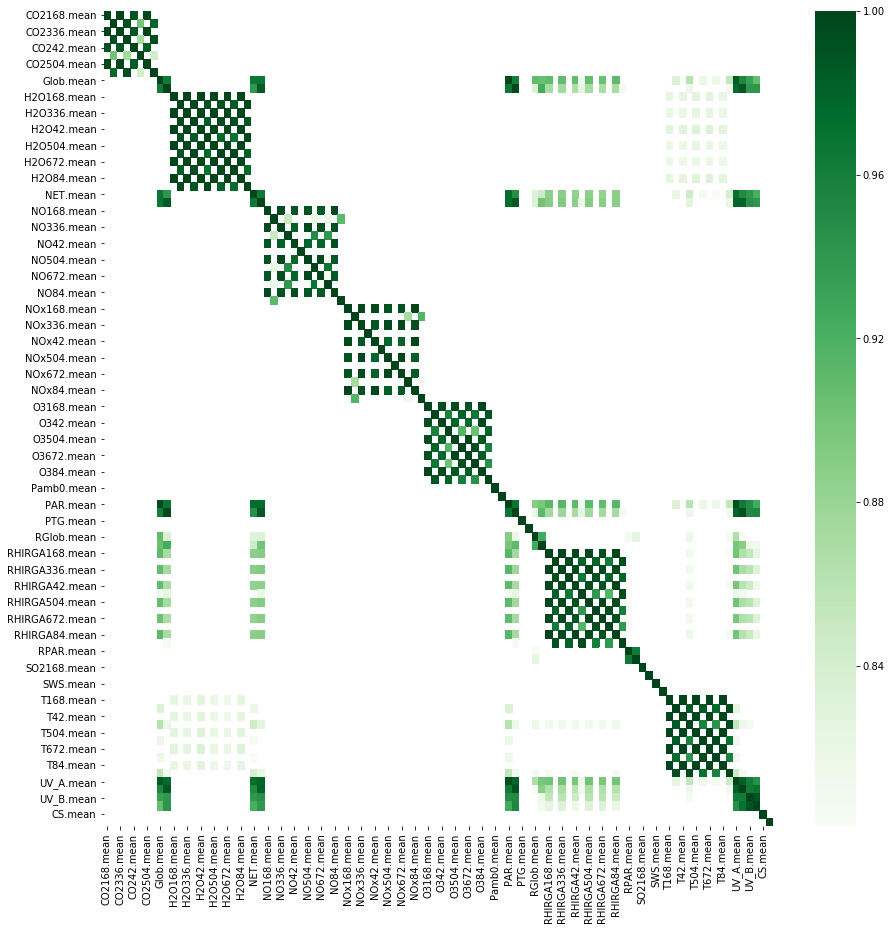

In [46]:
# correlation matrix
plt.figure(figsize=(15,15))
corr = df.corr().abs()
corr = corr[corr>=0.8] #treshold
sns.heatmap(corr, cmap = "Greens")
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = \
train_test_split(df.loc[:, df.columns != 'class2'], df["class2"], test_size=0.7, random_state=0)

In [65]:
from sklearn.preprocessing import StandardScaler
# standarsize the data - PCA is affected by scale
scaler = StandardScaler()
# fit on training only
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Feature selection using PCA
from sklearn.decomposition import PCA

# Minka’s MLE is used to guess the dimension
pca = PCA(n_components='mle', svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
# select all but class2
pca.fit(X_train)
# number of features
pca.n_components_



87

In [67]:
# Apply dimensionality reduction to X
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10)

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/hytonenj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8438538205980066